In [21]:
#packages for data analysis
import numpy as np
import pandas as pd

import sklearn
from sklearn import svm

#to visualize data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)

%matplotlib inline

In [22]:
recipes = pd.read_csv('/Users/vivekbhadula/Jupyter/recipes_muffins_cupcakes.csv');
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


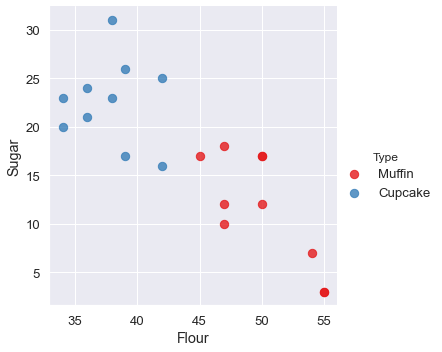

In [23]:
#plot our data
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={'s':70})

In [24]:
#format or pre-process our data
type_label = np.where(recipes['Type'] == 'Muffin', 0, 1)
recipe_features = recipes.columns.values[1:].tolist()
recipe_features
ingredients = recipes[['Flour', 'Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [25]:
#fit model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [30]:
#get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]

#plot the parallels to the separating hyperplane that pass throught the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

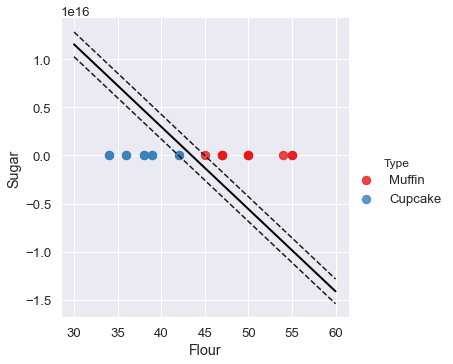

In [33]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={'s':70})
plt.plot(xx, yy, linewidth = 2, color = 'black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [36]:
#create a function to predict muffin or cupcake
def muffinOrCupcake(flour, sugar):
    if (model.predict([[flour, sugar]]) == 0):
        print('You\'re looking at a muffin recipe')
    else:
        print('You\'re looking at a cupcake recipe')
        

muffinOrCupcake(50,20)

You're looking at a muffin recipe


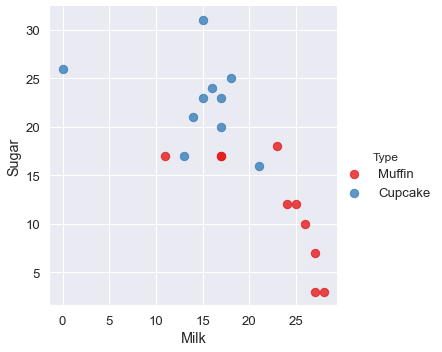

In [37]:
sns.lmplot('Milk', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={'s':70})

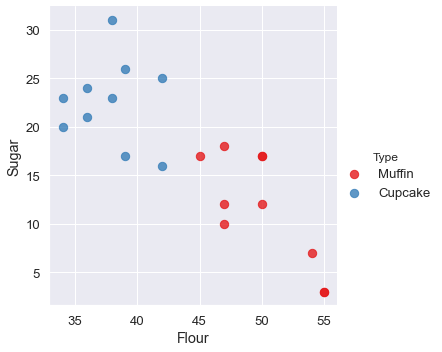

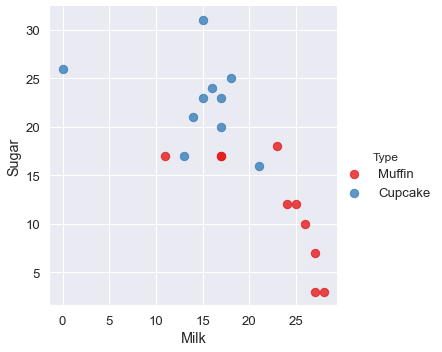

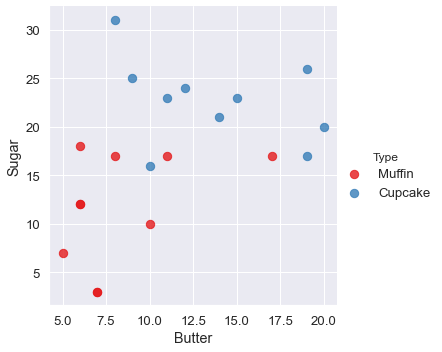

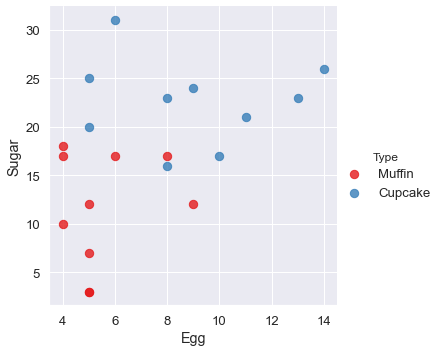

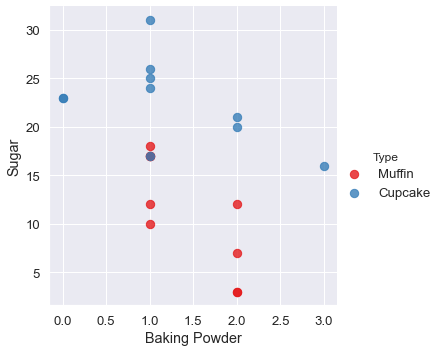

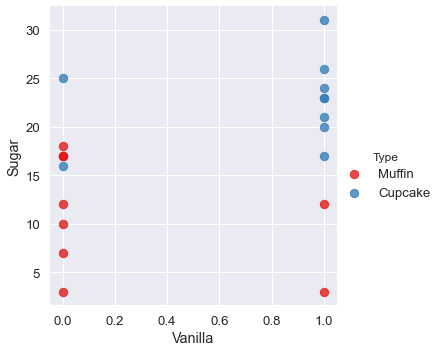

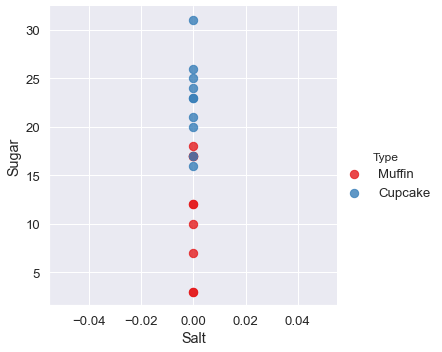

In [42]:
cols = len(recipes.columns)
for i in range(1,cols):
    if recipes.columns[i] == 'Sugar':
        pass
    else:
        sns.lmplot(recipes.columns[i], 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={'s':70})